# Simple CNN for MNIST

## Imports:  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, TensorBoard

import tensorflow as tf
import os
import time
import pickle

sns.set(style='white', context='notebook', palette='deep')

working_dir="C:/Users/chenx/Desktop/1811_softdesign/20181125 - MNIST/"

Using TensorFlow backend.


## Data

In [2]:
train_csv_path = os.path.join(working_dir, "dataset","train.csv")
test_csv_path = os.path.join(working_dir, "dataset", "test.csv")

train = pd.read_csv(train_csv_path)
test = pd.read_csv(test_csv_path)

#### Separate training data into X,Y:  
X: Training Label  
Y: Image Data

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

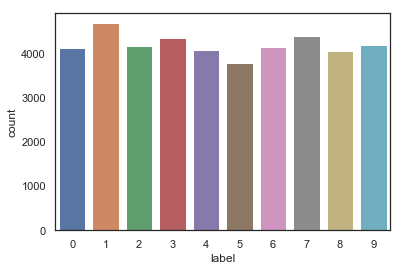

In [3]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

# Visualization:
g = sns.countplot(Y_train)
Y_train.value_counts()

#### Checking for nulls:

In [4]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [5]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

#### Normalization:
  
From grayscale 0~255 to 0~1  
  

In [6]:
X_train = X_train / 255.0
test = test / 255.0

#### Reshaping:
From 1D 784 to 28x28x1

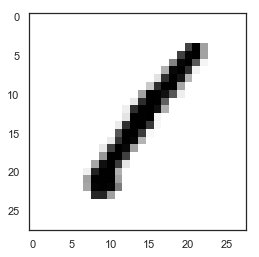

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

g = plt.imshow(X_train[0][:,:,0], cmap=plt.cm.binary)

#### Y_train label to hot vector

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Splitting test data

In [9]:
random_seed = 0

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train,
                                                  test_size=0.1, # 10% used for validation
                                                  random_state=random_seed)

#### Saving processed data
    Using pickle to save processed data

In [10]:
pfile = open(os.path.join(working_dir, "pickle", "X_train.pickle"), "wb")
pickle.dump(X_train, pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "X_test.pickle"), "wb")
pickle.dump(X_test, pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_train.pickle"), "wb")
pickle.dump(Y_train, pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_test.pickle"), "wb")
pickle.dump(Y_test, pfile)
pfile.close()

In [11]:
pfile = open(os.path.join(working_dir, "pickle", "X_train.pickle"), "rb")
X_train = pickle.load(pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "X_test.pickle"), "rb")
X_test = pickle.load(pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_train.pickle"), "rb")
Y_train = pickle.load(pfile)
pfile.close()

pfile = open(os.path.join(working_dir, "pickle", "Y_test.pickle"), "rb")
Y_test = pickle.load(pfile)
pfile.close()

## Models
+ Simple
+ Convoluted

### Super simple model
     Input Layer
     All connected, size 128
     All connected, size 128
     Output all connected, size 10

In [11]:
simple_model = Sequential()

simple_model.add(Flatten())
simple_model.add(Dense(128, activation="relu"))
simple_model.add(Dense(128, activation="relu"))
simple_model.add(Dense(10, activation="softmax"))

#### Training
    Using "adam" as optimizer: this is an ordinary optimizer for NNs
    "categorical_crossentropy" as loss function: this is also ordinary
    Epoch: 5, not a very complicated network

In [12]:
simple_model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [13]:
simple_model.fit(X_train, Y_train, 
                 epochs=30,
                validation_data = (X_test,Y_test))

Train on 37800 samples, validate on 4200 samples
Epoch 1/30
37800/37800 [==============================] - 4s 100us/step - loss: 0.2776 - acc: 0.9169 - val_loss: 0.1487 - val_acc: 0.9555
Epoch 2/30
37800/37800 [==============================] - 3s 88us/step - loss: 0.1142 - acc: 0.9646 - val_loss: 0.1187 - val_acc: 0.9640
Epoch 3/30
37800/37800 [==============================] - 3s 88us/step - loss: 0.0775 - acc: 0.9761 - val_loss: 0.1133 - val_acc: 0.9676
Epoch 4/30
37800/37800 [==============================] - 3s 89us/step - loss: 0.0587 - acc: 0.9815 - val_loss: 0.1214 - val_acc: 0.9643
Epoch 5/30
37800/37800 [==============================] - 4s 94us/step - loss: 0.0444 - acc: 0.9859 - val_loss: 0.1832 - val_acc: 0.9545
Epoch 6/30
37800/37800 [==============================] - 3s 90us/step - loss: 0.0363 - acc: 0.9879 - val_loss: 0.1328 - val_acc: 0.9629
Epoch 7/30
37800/37800 [==============================] - 3s 91us/step - loss: 0.0294 - acc: 0.9900 - val_loss: 0.1124 - val_acc

#### Evaluation
     Loss and accuracy is slightly lower than in training:
     Not very overfitted

In [14]:
val_loss, val_acc = simple_model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

4200/4200 [==============================] - 0s 37us/step
0.1850168714397233 0.975


#### Looking at a random example

In [15]:
predictions = simple_model.predict([X_test])

6


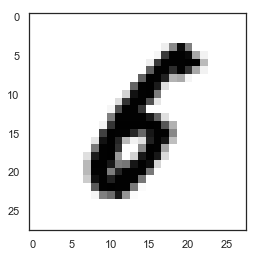

In [16]:
choice = np.random.randint(0,4201)

print(np.argmax(predictions[choice]))
g = plt.imshow(X_test[choice][:,:,0], cmap=plt.cm.binary)

#### Saving simple_model

In [17]:
simple_model_name = "mnist-simple-{}.model".format(int(time.time()))
simple_model.save(os.path.join(working_dir, "models", simple_model_name))

### CNN Model:
    Convlution size32 x2
    Down Sampling by 2x2
    Drop Out by 25% probablity
    
    Convlution size64 x2
    Down Sampling by 2x2
    Drop Out by 25% probablity
    
    Flatten layer
    All connected size256
    Drop Out by 50% probablity
    Output all connected size10

In [12]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters = 32,
                    kernel_size = (5,5),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(Conv2D(filters = 32,
                    kernel_size = (5,5),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.25))


cnn_model.add(Conv2D(filters = 64,
                    kernel_size = (3, 3),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(Conv2D(filters = 64,
                    kernel_size = (3, 3),
                    padding = 'Same',
                    activation = 'relu',
                    input_shape = (28,28,1)))

cnn_model.add(MaxPool2D(pool_size=(2, 2),
                        strides=(2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax')) # Output Layer

#### Optimizer and loss function
* Optimizer:
      "Adam", because it is easier to type
* Loss Function:
      categorical_crossentropy as ordinary loss function

In [13]:
cnn_model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
hasattr(cnn_model, 'train_function')

True

#### Learning rate reduction

In [14]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

#### Data augmentation
    Randomly shift, zoom ,rotate; manipulate the images to minimize overfitting

In [15]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

#### Training

In [16]:
epochs = 16
batch_size = 128

In [17]:
#Setting up TensorBoard:
cnn_model_name = "mnist-cnn-e%i-b%i-%i" %(epochs, batch_size,int(time.time()))
logd = os.path.join(working_dir, "logs", cnn_model_name)
tensorboard = TensorBoard(log_dir=logd)

In [18]:
history = cnn_model.fit_generator(datagen.flow(X_train,Y_train,batch_size=batch_size),
                                  epochs = epochs, 
                                  validation_data = (X_test,Y_test), 
                                  steps_per_epoch = X_train.shape[0] // batch_size, 
                                  callbacks = [learning_rate_reduction, tensorboard])

Epoch 1/16
295/295 [==============================] - 11s 39ms/step - loss: 0.4783 - acc: 0.8462 - val_loss: 0.0795 - val_acc: 0.9745
Epoch 2/16
295/295 [==============================] - 10s 34ms/step - loss: 0.1572 - acc: 0.9527 - val_loss: 0.0526 - val_acc: 0.9843
Epoch 3/16
295/295 [==============================] - 10s 34ms/step - loss: 0.1115 - acc: 0.9667 - val_loss: 0.0549 - val_acc: 0.9848 - ETA: 1s - loss: 0.1140 - acc: 0. - ETA: 1s - loss
Epoch 4/16
295/295 [==============================] - 10s 34ms/step - loss: 0.0911 - acc: 0.9725 - val_loss: 0.0394 - val_acc: 0.9881
Epoch 5/16
295/295 [==============================] - 10s 34ms/step - loss: 0.0817 - acc: 0.9750 - val_loss: 0.0266 - val_acc: 0.9921
Epoch 6/16
295/295 [==============================] - 10s 34ms/step - loss: 0.0707 - acc: 0.9789 - val_loss: 0.0240 - val_acc: 0.9929s: 0.0 - ETA: 2s - loss: 0.0707 - acc: 0.9 - ETA: 2s - loss: 0.0704 - ETA: 1s - loss
Epoch 7/16
295/295 [==============================] - 11s 37

In [18]:
val_loss, val_acc = cnn_model.evaluate(X_test, Y_test)
print(val_loss, val_acc)

4200/4200 [==============================] - 0s 104us/step
0.017648950389268413 0.995


In [19]:
cnn_model.save(os.path.join(working_dir, "models", cnn_model_name)+".model")

#Pickle-dumping training history
pfile = open(os.path.join(working_dir, "models", cnn_model_name)+".history", "wb")
pickle.dump(history, pfile)
pfile.close()

### Model Evaluation

In [6]:
# Loading pre-trained model and history
load_model_name = "mnist-cnn-e16-b16-1543156612"
cnn_model = load_model(os.path.join(working_dir, "models", load_model_name)+".model")

#Pickle-loading training history
pfile = open(os.path.join(working_dir, "models", cnn_model_name)+".history", "rb")
history = pickle.load(pfile)
pfile.close()